<a href="https://colab.research.google.com/github/nichakornchaisuwan/multivariaet/blob/main/Multivariate_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ให้นักศึกษาทำข้อสอบใน Colab Notebook นี้โดยกรอกข้อมูลของตัวเองใน cell ที่ 2 แล้วรัน cell ที่ 1 - 5 และเริ่มทำข้อสอบใน cell ที่ 6 เป็นต้นไป

โดยโจทย์คือ
1. ข้อมูลโจทย์ อยู่ใน ตัวแปร ```Data```
2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ
3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ
4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.
5. เขียน comments อธิบายทุกขั้นตอน
6. อัด video อธิบาย code ทุกๆขั้นตอนรวมถึงผลแล้วอัพลง youtube ในรูปแบบ unlist 
7. commit โดยใช้ชื่อ commit เป็น link youtube ที่อธิบาย code ในข้อ 6.

กำหนดส่งวันที่ 2 พฤษภาคม 2564 (โดยให้มากรอกวันที่ commit ครั้งสุดท้ายใน sheet: https://docs.google.com/spreadsheets/d/1_qJwLDJVtOW1HxBcf_FHVc6UT4J_SOonuR6o3EEnVzw/edit?usp=sharing ช่อง Final)

In [ ]:
from sklearn.datasets import make_blobs
import random,math
import numpy as np
import pandas

In [ ]:
Name = 'ณิชากร ไชยสุวรรณ'
ID = '6230205218'

In [ ]:
def DataGenerator(name,id):
    random.seed(int(id[3:6]))
    numfeat = random.randint(20,30)
    ct = random.randint(len(name)-6,len(name))
    
    X, y = make_blobs(n_samples=10000, centers=ct, n_features=numfeat , random_state=int(id[3:6]))

    print(f'{id[3:6]}:{numfeat}:{ct}')
    X_t = (X[:,1]*2)+int(id[3])
    X_t2 = (X[:,-1]*5)+int(id[4])

    DT = np.append(X,X_t.reshape([10000,1]),axis=1)
    DT = np.append(DT,X_t2.reshape([10000,1]),axis=1)
    
    return pandas.DataFrame(DT)

In [ ]:
Data = DataGenerator(Name,ID)

020:30:16


In [ ]:
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,-10.187117,5.645359,-1.512009,-8.408605,-7.160649,8.152055,-5.137610,-8.514089,-6.140884,10.495298,1.590252,3.370453,0.659568,5.630557,1.300547,2.487644,6.066393,8.233752,-9.202617,-5.345057,5.844010,1.529182,-3.323277,3.321481,2.621559,-4.425307,4.524257,-4.957104,6.386672,-10.452964,11.290718,-50.264820
1,8.802957,-9.680265,-5.146325,-1.400457,4.109127,9.107175,8.461001,1.703898,-0.734701,-0.662673,3.817067,1.822420,4.052866,-3.271882,7.773785,7.411452,-4.505587,2.963060,7.674272,-9.869400,-8.226315,8.427967,5.859954,2.930561,4.895293,-7.116522,-8.471998,5.241182,-1.075735,4.753808,-19.360529,25.769040
2,4.566708,10.088068,6.267673,-5.007461,-6.157636,-4.656535,9.834261,1.608311,6.068735,-10.170915,7.084125,-9.178798,-7.684204,-11.860847,-3.715293,-3.697722,9.908313,6.599582,0.364110,7.548956,-8.481781,5.089799,-7.056839,-5.440225,7.366136,-6.099482,5.900475,-0.567453,3.676044,3.636315,20.176137,20.181577
3,-1.557750,-5.619996,-0.729111,7.873232,-7.234014,-3.057497,-2.156534,-4.396004,-8.843602,-6.002348,6.974013,-6.001278,-8.506518,-2.456330,1.138076,-3.899233,9.395032,-6.214876,9.013846,1.558676,6.049342,2.618855,-7.194114,-10.214505,8.954457,7.642740,4.098489,-1.835569,-1.134072,7.054722,-11.239992,37.273609
4,9.105714,-10.918593,-6.447384,1.260397,6.235345,10.998694,9.431398,4.326759,-1.366271,0.720983,2.657494,5.502511,6.129621,-1.155109,9.711989,5.343099,-7.353672,2.485260,7.425995,-9.048266,-7.630582,7.810077,6.552491,3.859978,5.717528,-3.768863,-7.753635,5.075417,-1.536883,5.055226,-21.837186,27.276130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.012739,-5.982394,-2.377600,3.991366,2.066386,8.939499,3.515521,-0.687216,-7.096250,-0.483933,-3.487503,-6.412030,1.698171,5.591985,2.200870,1.710173,4.215186,7.796989,7.679128,5.763228,-5.406276,-5.459429,8.663905,-0.663315,-1.347786,1.658434,4.270892,5.375995,-0.445427,10.680069,-11.964788,55.400344
9996,1.971844,9.351393,5.487986,5.947889,-8.621342,5.833916,-0.831200,0.799592,2.719228,-3.751520,-4.101230,3.144996,3.296714,7.119346,3.873315,-10.067322,-7.486359,5.966499,-6.699479,-5.169989,7.498531,8.563825,0.733198,-6.472467,4.942586,-0.162590,2.895984,5.859200,1.094162,0.813355,18.702787,6.066777
9997,4.313977,7.818759,6.398568,-4.755216,-5.181228,-3.405445,11.223262,3.490421,6.006418,-9.669740,6.020925,-9.548196,-8.811076,-9.948476,-4.142153,-3.013274,8.687351,7.583746,1.857641,5.131343,-10.503256,2.915657,-8.064281,-3.891103,7.350757,-5.370867,5.108498,0.922176,3.686926,3.322278,15.637518,18.611389
9998,3.029997,-7.750469,9.031552,9.307987,-1.619870,1.449752,-2.457904,6.772582,-7.931218,8.501263,6.798074,1.240366,4.155902,6.037059,0.815239,-5.158712,-5.980060,5.424738,4.949754,-0.027357,9.037065,-4.983274,-2.470661,-4.061016,-3.000973,3.853341,-7.830560,2.054371,2.182887,-10.723758,-15.500938,-51.618788


In [ ]:
Data.shape #เพื่อดูขนาดของข้อมูล

(10000, 32)

ตัดข้อมูลที่มี correlation กัน เพื่อลดข้อมูลที่ซ้ำกันออกจาก Data

In [ ]:
corr = np.corrcoef(Data.to_numpy().T) #เป็นคำสั่งในการสร้างเมทริกซ์สหสัมพันธ์

In [ ]:
corr.shape #เพื่อดูขนาดของความสัมพันธ์

(32, 32)

In [ ]:
corr #เพื่อดูค่าสหสัมพันธ์ที่ได้

array([[ 1.        , -0.05083607,  0.10638536, ...,  0.27341509,
        -0.05083607,  0.27341509],
       [-0.05083607,  1.        ,  0.11548714, ...,  0.01997763,
         1.        ,  0.01997763],
       [ 0.10638536,  0.11548714,  1.        , ..., -0.23673439,
         0.11548714, -0.23673439],
       ...,
       [ 0.27341509,  0.01997763, -0.23673439, ...,  1.        ,
         0.01997763,  1.        ],
       [-0.05083607,  1.        ,  0.11548714, ...,  0.01997763,
         1.        ,  0.01997763],
       [ 0.27341509,  0.01997763, -0.23673439, ...,  1.        ,
         0.01997763,  1.        ]])

ใช้คำสั่งวนลูปเพื่อหาค่า correlation ที่ซ้ำกัน โดยหากรันคำสั่งไปแล้ว มีการแสดงผลรัน หมายความว่ามีข้อมูลที่ซ้ำกัน

In [ ]:
for i in range(corr.shape[0]): 
  for j in range(corr.shape[1]):
    if(i!= j) and (corr[i,j]==1.):
      print(f'row ={i} column = {j} corrcoef = {corr[i,j]}')

row =1 column = 30 corrcoef = 1.0
row =30 column = 1 corrcoef = 1.0


หลังจากการทำการวนซ้ำ จะเห็นว่ามีการซ้ำกันของขอมูล จึงต้องทำการตัดข้อมูลออก

In [ ]:
new_Data = Data.iloc[:,1:-2]
new_Data

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,5.645359,-1.512009,-8.408605,-7.160649,8.152055,-5.137610,-8.514089,-6.140884,10.495298,1.590252,3.370453,0.659568,5.630557,1.300547,2.487644,6.066393,8.233752,-9.202617,-5.345057,5.844010,1.529182,-3.323277,3.321481,2.621559,-4.425307,4.524257,-4.957104,6.386672,-10.452964
1,-9.680265,-5.146325,-1.400457,4.109127,9.107175,8.461001,1.703898,-0.734701,-0.662673,3.817067,1.822420,4.052866,-3.271882,7.773785,7.411452,-4.505587,2.963060,7.674272,-9.869400,-8.226315,8.427967,5.859954,2.930561,4.895293,-7.116522,-8.471998,5.241182,-1.075735,4.753808
2,10.088068,6.267673,-5.007461,-6.157636,-4.656535,9.834261,1.608311,6.068735,-10.170915,7.084125,-9.178798,-7.684204,-11.860847,-3.715293,-3.697722,9.908313,6.599582,0.364110,7.548956,-8.481781,5.089799,-7.056839,-5.440225,7.366136,-6.099482,5.900475,-0.567453,3.676044,3.636315
3,-5.619996,-0.729111,7.873232,-7.234014,-3.057497,-2.156534,-4.396004,-8.843602,-6.002348,6.974013,-6.001278,-8.506518,-2.456330,1.138076,-3.899233,9.395032,-6.214876,9.013846,1.558676,6.049342,2.618855,-7.194114,-10.214505,8.954457,7.642740,4.098489,-1.835569,-1.134072,7.054722
4,-10.918593,-6.447384,1.260397,6.235345,10.998694,9.431398,4.326759,-1.366271,0.720983,2.657494,5.502511,6.129621,-1.155109,9.711989,5.343099,-7.353672,2.485260,7.425995,-9.048266,-7.630582,7.810077,6.552491,3.859978,5.717528,-3.768863,-7.753635,5.075417,-1.536883,5.055226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-5.982394,-2.377600,3.991366,2.066386,8.939499,3.515521,-0.687216,-7.096250,-0.483933,-3.487503,-6.412030,1.698171,5.591985,2.200870,1.710173,4.215186,7.796989,7.679128,5.763228,-5.406276,-5.459429,8.663905,-0.663315,-1.347786,1.658434,4.270892,5.375995,-0.445427,10.680069
9996,9.351393,5.487986,5.947889,-8.621342,5.833916,-0.831200,0.799592,2.719228,-3.751520,-4.101230,3.144996,3.296714,7.119346,3.873315,-10.067322,-7.486359,5.966499,-6.699479,-5.169989,7.498531,8.563825,0.733198,-6.472467,4.942586,-0.162590,2.895984,5.859200,1.094162,0.813355
9997,7.818759,6.398568,-4.755216,-5.181228,-3.405445,11.223262,3.490421,6.006418,-9.669740,6.020925,-9.548196,-8.811076,-9.948476,-4.142153,-3.013274,8.687351,7.583746,1.857641,5.131343,-10.503256,2.915657,-8.064281,-3.891103,7.350757,-5.370867,5.108498,0.922176,3.686926,3.322278
9998,-7.750469,9.031552,9.307987,-1.619870,1.449752,-2.457904,6.772582,-7.931218,8.501263,6.798074,1.240366,4.155902,6.037059,0.815239,-5.158712,-5.980060,5.424738,4.949754,-0.027357,9.037065,-4.983274,-2.470661,-4.061016,-3.000973,3.853341,-7.830560,2.054371,2.182887,-10.723758


In [ ]:
new_Data.shape #ดูขนาดของข้อมูลหลังจากลบข้อมูลที่มีการซ้ำกันออกแล้ว

(10000, 29)

##2.ทำ Clustering แล้วทำ Visualize ของข้อมูลแบบสองมิติ

###Clustering

ทำการจัดกลุ่มข้อมูล โดยวิธี Kmean ซึ่งเป็นการจัดกลุ่มโดยการวัดระยะห่างระหว่างข้อมูล 

Import

In [ ]:
from sklearn.cluster import KMeans # import ฟังก์ชั่นที่ใช้ในการหาค่า Kmean

Define

In [ ]:
kmeans = KMeans(n_clusters=3,random_state=2021) #หาค่า Kmean โดยสามารถกำหนดค่า k ที่ต้องการได้ แต่ค่า k นั้นไม่จำเป็นต้องกำหนดก็ได้ เนื่องจากว่า Kmean มีค่า defult อยู่แล้ว
# การกำหนด random state เพื่อให้โปรแกรมเริ่มทำการสุ่มที่จุดใด

fit-transform

คำนวณหาจุด cluster center ของข้อมูลด้วยวิธี K-Means Clustering

In [ ]:
kmeans.fit(new_Data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2021, tol=0.0001, verbose=0)

In [ ]:
kmeans.cluster_centers_ #เป็นคำสั่งที่ใช้แสดงจุด cluster centers ของข้อมูล

array([[-1.5456627 ,  0.25781517,  2.40928773, -0.10750198, -0.88632014,
        -2.49835529, -0.22768456, -2.46378259,  4.38559333,  1.87623604,
         3.5948659 ,  2.69541412,  4.71442694, -0.973899  ,  3.4990912 ,
         3.5080643 ,  2.21015434, -4.346085  ,  3.78462975,  0.15743889,
        -0.76703649, -2.13559153,  1.01782694, -2.48636489, -4.47607081,
        -2.2031181 ,  0.07729235,  1.34740627, -6.68158328],
       [ 1.47882354, -2.8933356 ,  0.5357953 ,  1.92347044, -3.62212321,
         4.35447446,  1.0156692 ,  2.1086338 , -3.32862248,  1.66950039,
        -3.06018237, -3.78770297, -4.14528077, -3.56080701, -0.41180727,
         1.60886296, -0.07951553,  3.65054853, -2.93566402,  1.41744566,
        -2.205982  , -1.71796173, -3.80952897,  6.75212935, -0.78810482,
         2.18060378, -0.01692502,  2.06719533,  3.5196445 ],
       [-0.15730541,  1.67045332,  3.86578222, -2.02619681,  7.62319369,
         4.66858531, -0.90355063,  0.03175224, -2.2460016 , -0.75573018,
  

ทดสอบการจัดกลุ่มของข้อมูล

In [ ]:
y=kmeans.predict(new_Data) # กำหนดข้อมูลที่จัดกลุ่มเป็น y
y

array([0, 2, 1, ..., 1, 0, 1], dtype=int32)

###Visualize

ทำการลด Dimension โดยวิธี PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca=PCA(n_components=2) #ต้องการลด Dimension ให้เหลือ 2 มิติ จึงกำหนด n_components=2

In [ ]:
new_pca=pca.fit_transform(new_Data)

In [ ]:
import matplotlib #import matplotlib เพื่อใช้ในการสร้างกราฟ

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
matplotlib.rcParams['figure.figsize']=[10,10] #เป็นการกำหนดขนาดของกราฟ เพื่อดูการกระจายของข้อมูล ในกรณีที่ข้อมูลมีการซ้อนกันมาก

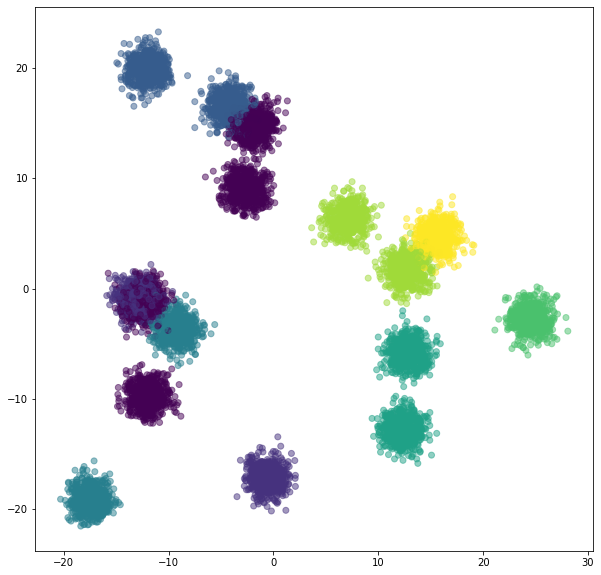

In [ ]:
kmeans=KMeans(random_state=2021)
kmeans.fit(new_Data)
y=kmeans.predict(new_Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y,alpha=0.5);

จากกราฟข้างต้น หากไม่มีการกำหนดกลุ่มของข้อมูล กราฟมีการจัดกลุ่ม แบ่งออกเป็น 8 กลุ่มตามสีที่แตกต่างกัน ดังนั้นจึงต้องหา ค่า k ที่เหมาะสม เพื่อให้ได้กลุ่มที่เหมาะสมกับข้อมูล

#วิธีหาค่า k

###วิธี The Elbow Method

หาค่า SSE เพื่อดูความคลาดเคลื่อนของข้อมูล

In [ ]:
kmeans.inertia_

3945198.1037585414

In [ ]:
SSE = list()
for k in [1,2,3,4,5,6,7,8]:
    kmeans=KMeans(n_clusters=k,random_state=2021)
    kmeans.fit(new_Data)
    SSE.append(kmeans.inertia_)

In [ ]:
SSE #เป็นการแสดงค่าความคลาดเคลื่อนของข้อมูล

[9906508.553051103,
 8561111.758623503,
 7526889.77271021,
 6811674.586506553,
 6062753.46985673,
 5334444.667888967,
 4621335.446433915,
 3945198.1037585414]

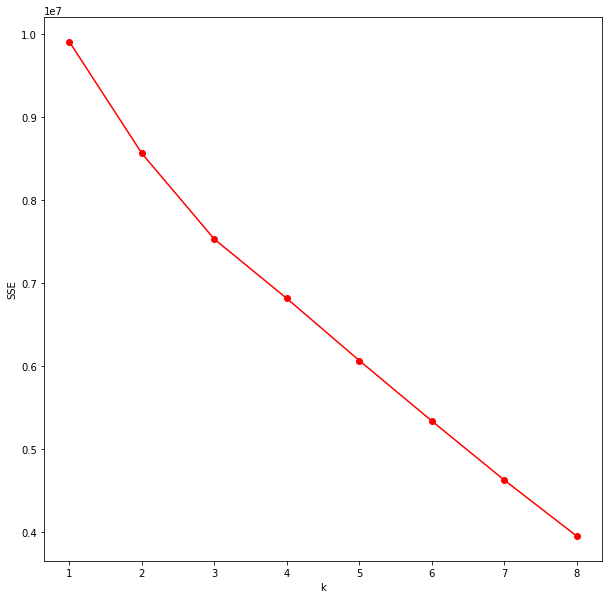

In [ ]:
plt.plot([1,2,3,4,5,6,7,8],SSE,'o-r') #plot กราฟเพื่อดูว่ามี k กี่กลุ่มที่เหมาะสม
plt.xlabel('k')
plt.ylabel('SSE');

จากกราฟข้างต้น จะเห็นว่า จุด 1-2  มีระยะห่างแบบหนึ่ง จุด 2-3 มีระยะห่างแบบหนึ่ง และจุด 3-8 ก็มีระยะห่างอีกแบบหนึ่ง ดังนั้นจึงสามารถจัดกลุ่ม k ได้ทั้งหมด 3 กลุ่มที่เหมาะสม

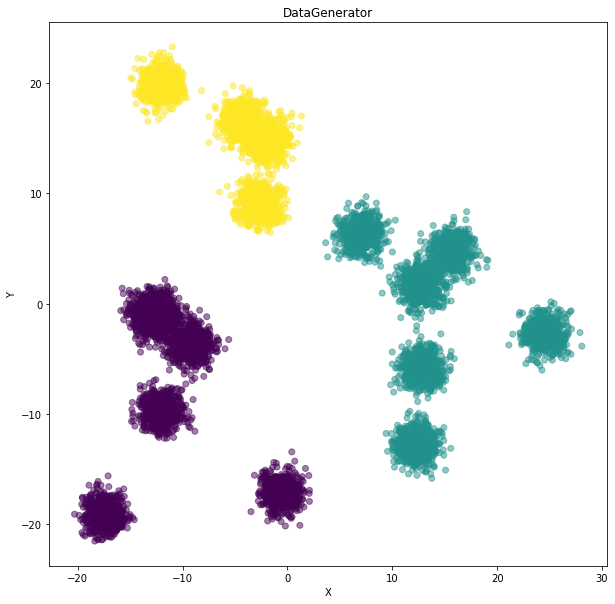

In [ ]:
kmeans=KMeans(n_clusters=3,random_state=2021) 
kmeans.fit(new_Data)
y=kmeans.predict(new_Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y,alpha=0.5)
plt.title('DataGenerator')
plt.xlabel('X')
plt.ylabel('Y');

จากการาฟข้างต้น เมื่อมีการจัดกลุ่ม k เท่ากับ 3 จะเห็นได้ว่าข้อมูลจะมีการรวมกันอยู่เพียง 3 กลุ่มเท่านั้น และข้อมูลสามารถมองเห็นได้ชัดเจน ไม่มีกลุ่มที่ทับซ้อนกัน

###วิธี Sildouette coeffient

Sildouette coeffient เป็นการหาค่า k จากค่าสัมประสิทธ์ภาพเงา โดยดูว่าจุดของข้อมูลนั้นอยู่ใกล้หรือ ห่าง กับจุดใดใน cluster มากน้อยเพียงใด

In [ ]:
from sklearn import metrics

In [ ]:
SilH=list()
for k in [2,3,4,5,6,7,8]:
  kmeans=KMeans(n_clusters=k,random_state=2021)
  kmeans.fit(new_Data)
  score=metrics.silhouette_score(new_Data,kmeans.labels_)
  SilH.append(score)

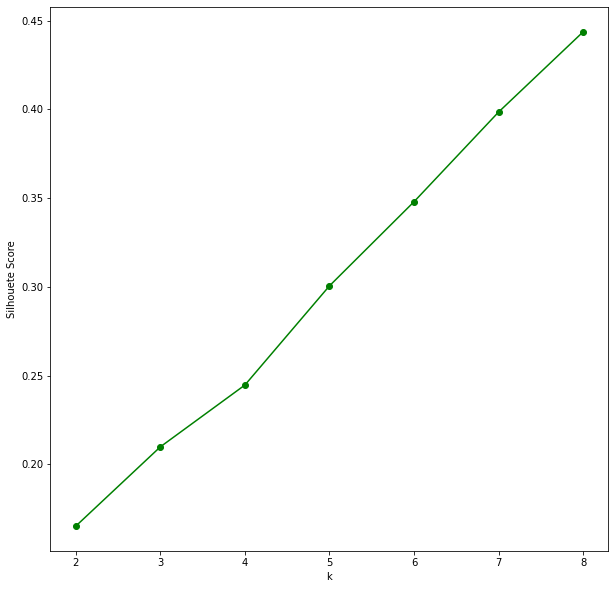

In [ ]:
plt.plot([2,3,4,5,6,7,8],SilH,'o-g')
plt.xlabel('k')
plt.ylabel('Silhouete Score');

จากกราฟข้างต้นจะเห็นได้ว่า k มีทั้งหมด 3 กลุ่ม ซึ่งดูจากจุดที่มีระยะห่างแตกต่างกันใน 3 ช่วง 1-2,2-3,3-7

In [ ]:
matplotlib.rcParams['figure.figsize']=[10,10]

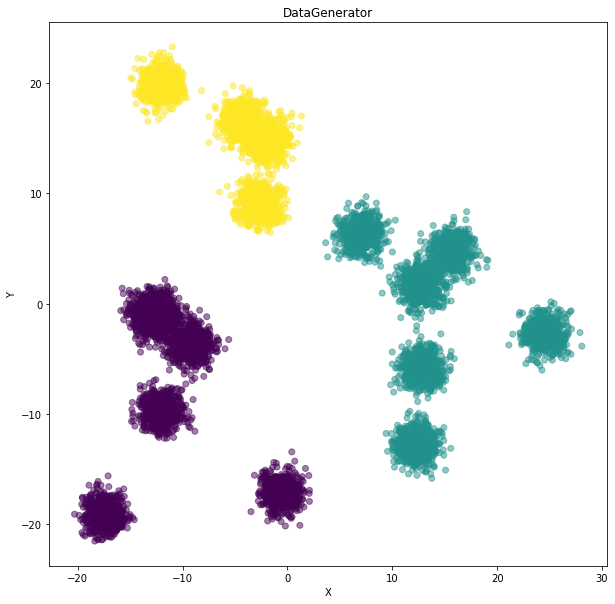

In [ ]:
kmeans=KMeans(n_clusters=3,random_state=2021)
kmeans.fit(new_Data)
y=kmeans.predict(new_Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y,alpha=0.5)
plt.title('DataGenerator')
plt.xlabel('X')
plt.ylabel('Y');

จากการาฟข้างต้น เมื่อมีการจัดกลุ่ม k เท่ากับ 3 จะเห็นได้ว่าข้อมูลจะมีการรวมกันอยู่เพียง 3 กลุ่มเท่านั้น และข้อมูลสามารถมองเห็นได้ชัดเจน ไม่มีกลุ่มที่ทับซ้อนกัน

##3.ทำการลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ2มิติ 

ในการทำการลด Dimension นั้นมีอยู่ทั้งหมด 3 วิธี คือ PCA, MDS, Factor Analysis โดยในที่นี้จะใช้การทำ MDS ในการลด Dimension ของข้อมูล

In [ ]:
from sklearn.manifold import MDS #import ฟังก์ชั่นในการทำ MDS

In [ ]:
mds=MDS(n_components=2) #ต้องการลด Dimension ให้เหลือ 2 มิติ จึงกำหนด n_components=2

In [ ]:
new_mds=mds.fit_transform(new_Data) #คำนวณหาระยะห่างระหว่างจุดของข้อมูล

####K-Mean

In [ ]:
kmeans1=KMeans(n_clusters=3,random_state=2021) n_clusters=3 มาจากการได้ k ที่เหมาะสมเท่ากับ3 จากข้างต้น
kmeans1.fit_transform(new_Data)
a=kmeans1.predict(new_Data)

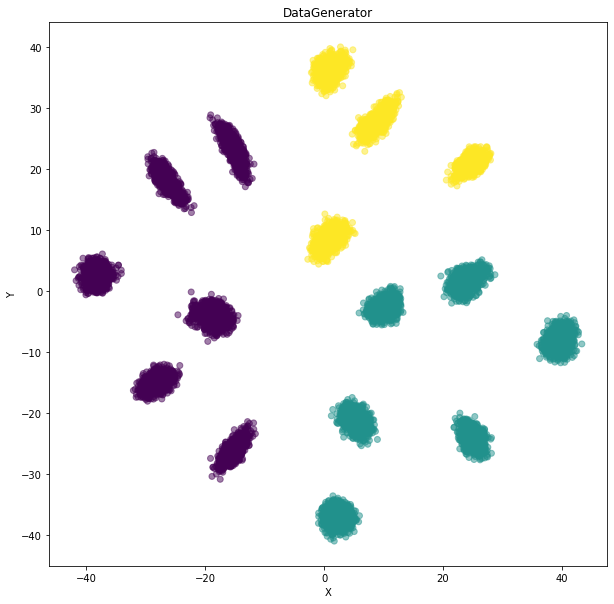

In [ ]:
plt.scatter(new_mds[:,0],new_mds[:,1],c=a,alpha=0.5)
plt.title('DataGenerator')
plt.xlabel('X')
plt.ylabel('Y');

จากการาฟข้างต้น เมื่อมีการจัดกลุ่ม k เท่ากับ 3 จะเห็นได้ว่าข้อมูลจะมีการรวมกันอยู่เพียง 3 กลุ่มเท่านั้น และข้อมูลสามารถมองเห็นได้ชัดเจน ไม่มีกลุ่มที่ทับซ้อนกัน

##4.เปรียบเทียบความแตกต่างของผลข้อ2. กับ ข้อ3.

กราฟข้อ2

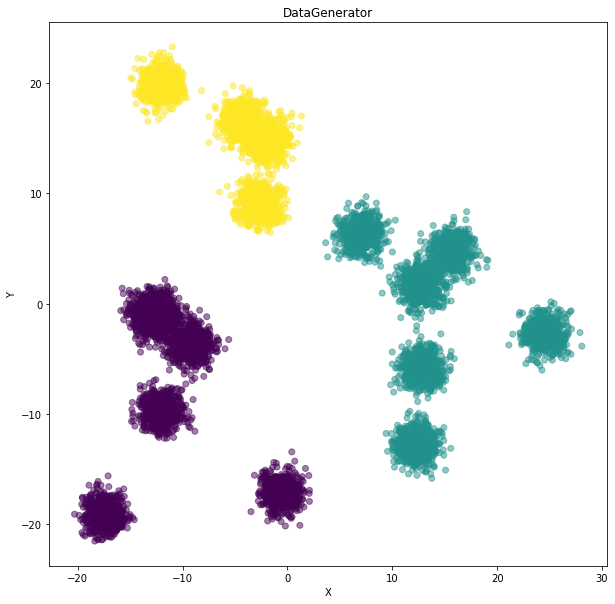

In [ ]:
plt.scatter(new_pca[:,0],new_pca[:,1],c=y,alpha=0.5)
plt.title('DataGenerator')
plt.xlabel('X')
plt.ylabel('Y');

กราฟข้อ3

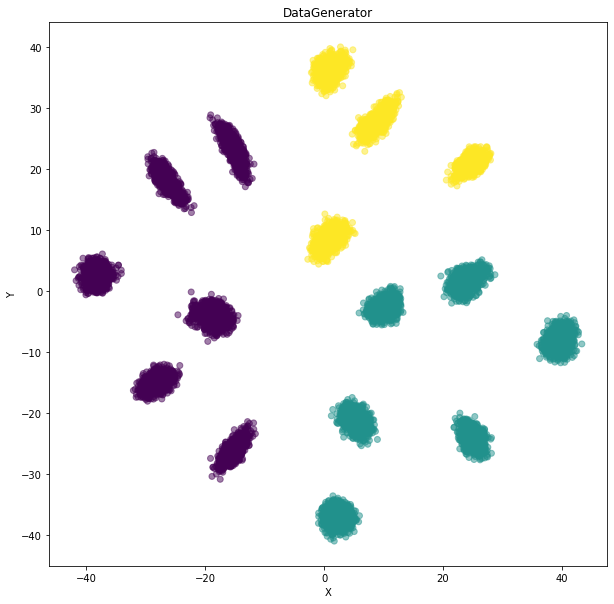

In [ ]:
plt.scatter(new_mds[:,0],new_mds[:,1],c=a,alpha=0.5)
plt.title('DataGenerator')
plt.xlabel('X')
plt.ylabel('Y');

เปรียบเทียบกราฟทั้งสอง พบว่าข้อมูลมีการกระจายที่ต่างกัน โดยที่กลุ่มของข้อมูลมีจำนวนกลุ่มที่เท่ากัน

กราฟที่ 2 เป็นการจัดกลุ่มโดย clustering ของข้อมูลก่อนจะทำการลด Dimention ซึ่งการลด Dimention จุดต่างของข้อมูลจะอยู่ที่เดิม

กราฟที่ 3 จะเป็นการลด Dimention ของข้อมูลก่อน จากนั้นจึงค่อยนำไปทำการ Clustering 